In [2]:
# Email spam classifier,,how google like companies gets to know about the spam before it is even send
# so we are going to develop a site where if any one types a message, it will be shown if that is spam or not
#https://www.kaggle.com/uciml/sms-spam-collection-dataset- UCI ML dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
S=pd.read_csv('spam.csv')

In [6]:
S.sample(5)                        # for random display

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3354,ham,Minimum walk is 3miles a day.,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
2009,ham,I can't keep going through this. It was never ...,NaN,NaN,NaN
1538,ham,Midnight at the earliest,NaN,NaN,NaN
3808,ham,At the funeral home with Audrey and dad,NaN,NaN,NaN


In [7]:
S.shape

(5572, 5)

In [9]:
# Stages of 
#1. Data ccleaning
#2. EDA
#3. Test preprocessing ( vectorizeiton, stemming, stopwords)
#4. Model building
#5. Evaluation
#6. Improvemnet
#7. Website
#8. Deployment on heruko

# 1. Data cleaning

In [10]:
# checking the extra columns

In [13]:
S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:
# dropping last 3 columns as they have approximately nun values in them

In [16]:
S.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [17]:
S.sample(5)

,v1,v2
1070,ham,"alright, I'll make sure the car is back tonight"
291,ham,Haf u found him? I feel so stupid da v cam was...
3491,ham,I will reach office around &lt;DECIMAL&gt; . ...
841,ham,Pls send me a comprehensive mail about who i'm...
1780,spam,BIG BROTHER ALERT! The computer has selected u...


In [18]:
# since the column names are not so discriptive, let's rename them

In [20]:
S.rename(columns={'v1':'target','v2':'text'},inplace=True)                           # using a dictionary syntax
S.sample(5)

,target,text
4538,ham,"Party's at my place at usf, no charge (but if ..."
4387,ham,"see you then, we're all christmassy here!"
757,ham,"Faith makes things possible,Hope makes things ..."
3037,ham,You are not bothering me but you have to trust...
5516,ham,"Ya, i'm referin to mei's ex wat... No ah, wait..."


In [22]:
# since we have 'ham' and 'spam' as two categorical value so we'll converting them to numbers

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [25]:
S['target']=le.fit_transform(S.target)                           

In [26]:
# so here 'ham' is being assigned 0 and 'spam' is assigned 1
 

In [27]:
S.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
# Checking missing values
S.isnull().sum()

target    0
text      0
dtype: int64

In [29]:
# Check for duplicate values
S.duplicated().sum()                          # duplicated() function

403

In [35]:
# Since there are 403 duplicated values so we hvae to remove them and saving the outcome back in our dataframe
S=S.drop_duplicates(keep='first')                             

In [37]:
S.duplicated().sum()                  # now they are gone


0

In [39]:
S.shape

(5169, 2)

# 2. EDA

In [40]:
# Understanding of data


In [41]:
#1. how much percent is spam and ham respectively in our dataset

In [42]:
S.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
S['target'].value_counts()                       

0    4516
1     653
Name: target, dtype: int64

In [45]:
# so 'ham' is much more that 'spam' in our dataset
# so visualising this 

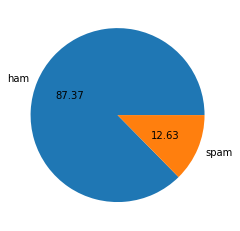

In [47]:
plt.pie(S['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()                              # so that we don't get extra piece of code in our o/p

In [48]:
# so 88percent is 'ham' and 12 percent is 'spam' ...data is imbalanced which is very important

In [49]:
# So now we are going to analyse about the alphabets, letter, words, sentences in our sms

In [ ]:
# So we are going to make 3 new columns as follows:
# Number of character in our sms
# Number of words in our sms
# Number of sentences in our sms

In [50]:
import nltk

In [51]:
nltk.download('punkt')             

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
S['text'].apply(len)                   

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [53]:
# and we'll save it in new column
S['num_character']=S['text'].apply(len)

<ipython-input-53-abdea503e3f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S['num_character']=S['text'].apply(len)


In [54]:
S.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [56]:
# Number of words
S['text'].apply(lambda x :nltk.word_tokenize(x))               

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, �_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [57]:
# now every sms is broken into words and they are stored in list and so now we'll count how many of them we have 

In [58]:
S['text'].apply(lambda x: len(nltk.word_tokenize(x)))             

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [59]:
# saving it in new column

In [60]:
S['num_words']=S['text'].apply(lambda x: len(nltk.word_tokenize(x)))

<ipython-input-60-2790496ea1d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S['num_words']=S['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [61]:
S.head(5)

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [62]:
# Now for number of sentences

In [63]:
S['text'].apply(lambda x:(nltk.sent_tokenize(x)))                    # on the basis of sent. they are broken

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will �_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [64]:
# For their length
S['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [65]:
S['num_sentences']=S['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-65-faa05e9cee33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S['num_sentences']=S['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [66]:
S.head(5)

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [67]:
S[['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [68]:
# So here we can see there is a sms with 910 char, 220 words and 38 sent
# Looking at the mean we see that on an average 78 char, 18words and approx. 2 sent are used per sms

In [69]:
# let's analyse 'ham' and 'spam' separately

In [76]:
S[S['target']==0][['num_character','num_words','num_sentences']].describe()     


,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [77]:
S[S['target']==1][['num_character','num_words','num_sentences']].describe()            

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [78]:
# so comparing mean 
# so in 'ham' the avg char is used 71 while in 'spam' it is 137. In same way the num of words and number of sentences for 'ham'&'spam' differs drastically.
# With which we can say the 'spam' messages are relatively longer than 'ham'

In [79]:
# Let's plot it using histogram

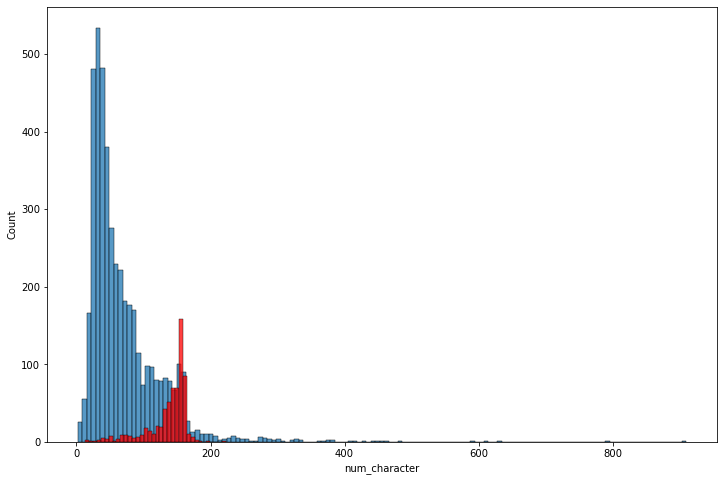

In [87]:
plt.figure(figsize=(12,8));
sns.histplot(S[S['target']==0]['num_character']);                        # we extracted num_char column from...
sns.histplot(S[S['target']==1]['num_character'],color='red');
#plt.figure(figsize=(12,8))

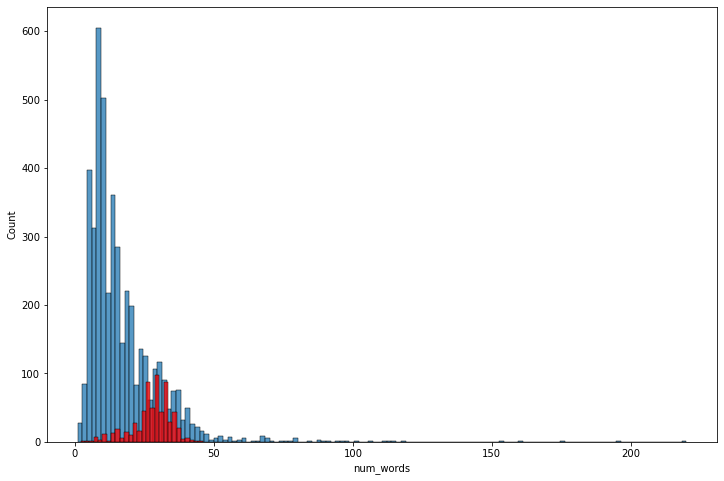

In [89]:
plt.figure(figsize=(12,8));
sns.histplot(S[S['target']==0]['num_words']);                        # we extracted num_char column from...
sns.histplot(S[S['target']==1]['num_words'],color='red');

In [90]:
#So most of the 'ham' messages are made from less words and 'spam' messages are made of more words
# there are some outliers also

In [91]:
# Let's see the relationship between them

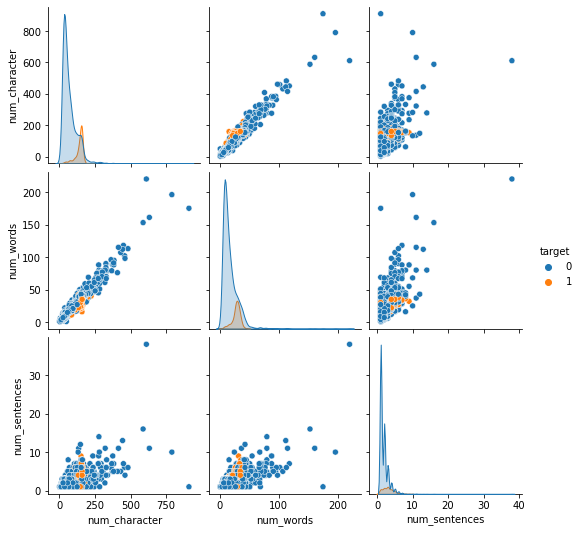

In [92]:
sns.pairplot(S,hue='target')

In [94]:
# so as we can see num_char is roughly linear with num_sent( as char inc, sent inc) and we can clearly see the outliers which can disturb our further analysis


In [95]:
S.corr()

,target,num_character,num_words,num_sentences
target,1.000000,0.382785,0.263143,0.269132
num_character,0.382785,1.000000,0.966087,0.626197
num_words,0.263143,0.966087,1.000000,0.680924
num_sentences,0.269132,0.626197,0.680924,1.000000


<AxesSubplot:>

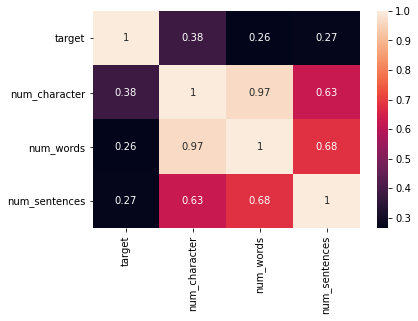

In [99]:
sns.heatmap(S.corr(),annot=True)                               # so annot means the display of the details on each color about their column etc

# 3. Data Preprocessing:
*Lower case

*Tokenisation

*Removing special characters   (examples::)) we'll only those char. which are alphabetical or alphanumeric

*Removing stop words and punctuations

*Stemming

In [101]:
# so we are creating a function which will perform these steps at once

In [120]:
def transform_text(text):
    text=text.lower()                                     # this function will convert all sent in lower case
    text=nltk.word_tokenize(text)                         # this will convert our sent to separate words
    
    # since text has been converted into a list now 
    y=[]
    for i in text:                                       # this loop is:: wherever we get alphabet or numerical, keep it and append it into y and return y
        if i.isalnum():
            y.append(i)
            
    
    text=y[:]                                      # you can't simpy copy the data, you have to clone it so that's y used colon
    y.clear()                                          # so y gets empty again 

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:                      # so if 'i' is not in stopwords' list and punctuations' list then append it into y which is empty now
            y.append(i)
    
    
    
    text=y[:]
    y.clear()                                 # clearing y again
    
    
    
    for i in text:
        y.append(ps.stem(i))
    
    
    return " ".join(y)


# 37:00

In [ ]:
# this function contain all the above req steps

In [126]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')               # this o/p will be processed on all req. category

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [111]:
# To see stop words in english
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [113]:
# To see punctuation marks
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [119]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()                               
ps.stem('Dancing')

'danc'

In [124]:
S['text'][0]                                  # trying with our dataset and put it into above function

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [127]:
# so using that function

In [129]:
S['transformed_text']=S['text'].apply(transform_text)                                # we have applied the function to our sms or data and saving it back in our DF

<ipython-input-129-067a647cc4b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S['transformed_text']=S['text'].apply(transform_text)                                # we have applied the function to our sms or data and saving it back in our DF


In [130]:
S.head()

,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [131]:
# so now we have transformed text column and we gonna use only two columns which is obvious

In [132]:
# word cloud---showing important words or mostly used in our sms is enlarged

In [134]:
!pip install wordcloud

In [139]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [140]:
spam_wc=wc.generate(S[S['target']==1]['transformed_text'].str.cat(sep=''))                        # we are looking for spam rows and inside which we are extracting the string and concating on top of space   45:00

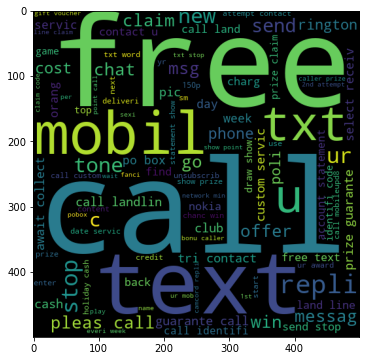

In [142]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc);

In [ ]:
# these highlated words are mostly used in spam

In [146]:
ham_wc=wc.generate(S[S['target']==0]['transformed_text'].str.cat(sep=''))

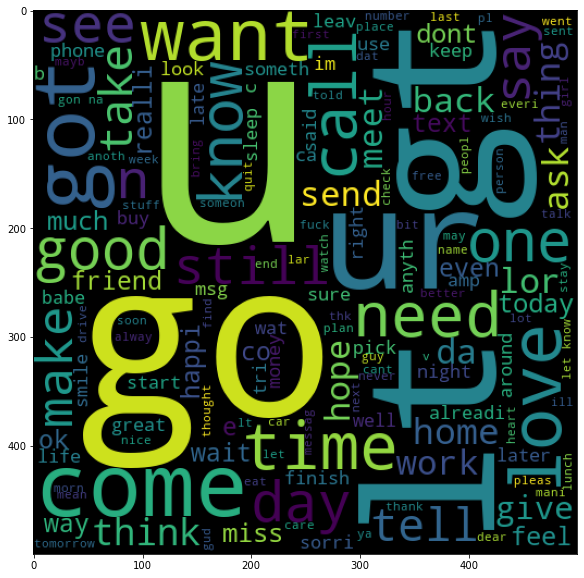

In [150]:
plt.figure(figsize=(15,10))
plt.imshow(ham_wc);

In [ ]:
# these are the words mostly used in 'ham'

In [148]:
# let's see top 30 words which are mostly used in 

In [149]:
S.head()

,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [153]:
S[S['target']==1]['transformed_text'].tolist()                 #48:00 # so this is in series converting in list

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [154]:
for msg in S[S['target']==1]['transformed_text'].tolist():
    print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [155]:
# now we want all the words so
spam_corpus=[]
for msg in S[S['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [158]:
len(spam_corpus)                      # so all spam words are around 10000

9941

In [159]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [160]:
# so it has created a dicitonary about the frequence of our words

In [161]:
Counter(spam_corpus).most_common(30)              # these are the most commonly used words

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [162]:
pd.DataFrame(Counter(spam_corpus).most_common(30))                      # we have saved it in a DF

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


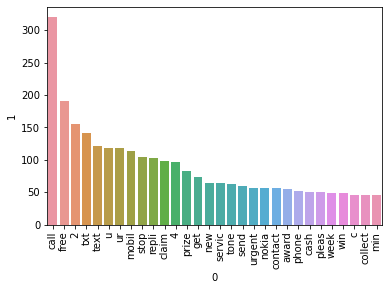

In [167]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1]);        #51:00
# all of these words are below
plt.xticks(rotation='vertical')                             # to read the words
plt.show()
                        # try it without plt.show()
# plotting of the words of that dataframe wrt both the columns

In [168]:
# 51:00 importaantt thing he said-----interpretability

In [ ]:
# Do these steps for 'ham' also

In [169]:
ham_corpus=[]
for msg in S[S['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [170]:
len(ham_corpus)

35303

In [171]:
Counter(ham_corpus)

Counter({'go': 404,
         'jurong': 1,
         'point': 17,
         'crazi': 10,
         'avail': 13,
         'bugi': 7,
         'n': 120,
         'great': 97,
         'world': 28,
         'la': 7,
         'e': 77,
         'buffet': 2,
         'cine': 7,
         'got': 236,
         'amor': 1,
         'wat': 108,
         'ok': 215,
         'lar': 38,
         'joke': 14,
         'wif': 27,
         'u': 883,
         'oni': 4,
         'dun': 55,
         'say': 127,
         'earli': 33,
         'hor': 2,
         'c': 57,
         'alreadi': 90,
         'nah': 10,
         'think': 149,
         'goe': 26,
         'usf': 10,
         'live': 25,
         'around': 59,
         'though': 26,
         'even': 77,
         'brother': 17,
         'like': 234,
         'speak': 24,
         'treat': 19,
         'aid': 2,
         'patent': 1,
         'per': 9,
         'request': 6,
         'mell': 1,
         'oru': 2,
         'minnaminungint': 1,
         'nur

In [172]:
Counter(ham_corpus).most_common(30)     

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('love', 216),
 ('ok', 215),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


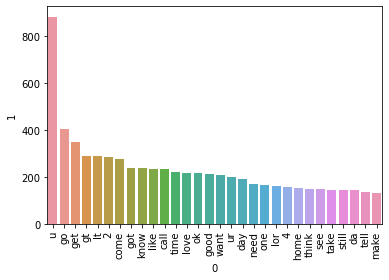

In [174]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1]);        #51:00
# all of these words are below
plt.xticks(rotation='vertical')                             # to read the words
plt.show()

# 4. Model building

In [177]:
# we are using Naive Bayes .......why?  textual data's performance is best achieved through NB

In [178]:
# since our input will be two columns i.e target and transformed_text in which it is textual data so we have to convert it into vectors through BOW, TF/IDF or Word2vec

In [213]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer                    # To use BOW we use count vectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [214]:
X=tfidf.fit_transform(S['transformed_text']).toarray()                    # what we get is in sparse array so we are converitng this in dense array

In [215]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [216]:
X.shape                                  # 6677 words

(5169, 6677)

In [217]:
y=S['target'].values

In [218]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [219]:
y.shape

(5169,)

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [222]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB 
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

# so we want to reduce the false positive so it is a high preciion model

In [223]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [224]:
gnb.fit(x_train,y_train)
y_pred1= gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[791 105]
 [ 25 113]]
0.518348623853211


In [225]:
mnb.fit(x_train,y_train)
y_pred2= mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [226]:
# since it is an imbalace data, precision matters more than accuracy so we'll try again

In [227]:
bnb.fit(x_train,y_train)
y_pred3= bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


In [ ]:
# so we have choices now and we;ll go with mnb because of the precision, so not a single sms is classifying as spam even if it is not spam

In [230]:
# as we can see the BernoulliNB is the one which satisfies our case study giving us the precision of 98% and accuracy of 97%. With this, we can deploy it later to a website platform and it will be a fruitful page to separate the 'hams' and 'spams'.